In [1]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

# Dataset generation

In [2]:
def load_images_from_folder(folder):
    train_data=[]
    count = 0
    for filename in os.listdir(folder):
        count += 1
        if count == 4001:
            return train_data
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE) #reading grayscale image
        img=~img #converting to it's negative
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY) #converting grayscale to binary
            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) #finding contours
            
            #most of the times it return only one contour as there is only one symbol in one image
            #but in some images that image has some disconnected parts so it gives two or more contours.
            #But we want our rectangle to contain the whole digit and then we select the contour with maximum area.
            
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            
            #We sort our contours first on basis of boundingRect because Bounding rectangle is the smallest 
            #horizontal rectangle enclosing the entire contour. So when next we go and select the maximum area rectangle,
            #we also get the rectangle which is the smallest horizontal rectangle enclosing the entire contour.
            #So in simple words we can say that we select the contour with maximum area which is also the smallest horizontal
            #rectangle to enclose the entire contour.
            
            w=int(28)
            h=int(28)
            maxi=0
            k = 0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            #then we crop else part of the image and select only contour part which contains the symbol and then resize and
            #reshape so it can be processed furthrt
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data

In [3]:
data=[]

In [6]:
#assign '-'=10
data=load_images_from_folder('C:\Shubh\Study MAterial\ml\datasets\handwritten equation solver\extracted_images\-')

for i in range(0,len(data)):
    data[i]=np.append(data[i],['10'])

print(len(data))


4000


In [7]:
#assign + = 11
data11=load_images_from_folder('C:\Shubh\Study MAterial\ml\datasets\handwritten equation solver\extracted_images\+')

for i in range(0,len(data11)):
    data11[i]=np.append(data11[i],['11'])
data=np.concatenate((data,data11))
print(len(data))
print(np.shape(data))

8000
(8000, 785)


In [8]:
data0=load_images_from_folder('C:\Shubh\Study MAterial\ml\datasets\handwritten equation solver\extracted_images/0')
for i in range(0,len(data0)):
    data0[i]=np.append(data0[i],['0'])
data=np.concatenate((data,data0))
print(len(data))

12000


In [9]:
data1=load_images_from_folder('C:\Shubh\Study MAterial\ml\datasets\handwritten equation solver\extracted_images/1')

for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['1'])
data=np.concatenate((data,data1))
print(len(data))

16000


In [10]:
data2=load_images_from_folder('C:\Shubh\Study MAterial\ml\datasets\handwritten equation solver\extracted_images/2')

for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['2'])
data=np.concatenate((data,data2))
print(len(data))

20000


In [11]:
data3=load_images_from_folder('C:\Shubh\Study MAterial\ml\datasets\handwritten equation solver\extracted_images/3')

for i in range(0,len(data3)):
    data3[i]=np.append(data3[i],['3'])
data=np.concatenate((data,data3))
print(len(data))

24000


In [12]:
data4=load_images_from_folder('C:\Shubh\Study MAterial\ml\datasets\handwritten equation solver\extracted_images/4')

for i in range(0,len(data4)):
    data4[i]=np.append(data4[i],['4'])
data=np.concatenate((data,data4))
print(len(data))

28000


In [13]:
data5=load_images_from_folder('C:\Shubh\Study MAterial\ml\datasets\handwritten equation solver\extracted_images/5')

for i in range(0,len(data5)):
    data5[i]=np.append(data5[i],['5'])
data=np.concatenate((data,data5))
print(len(data))

31545


In [14]:
data6=load_images_from_folder('C:\Shubh\Study MAterial\ml\datasets\handwritten equation solver\extracted_images/6')

for i in range(0,len(data6)):
    data6[i]=np.append(data6[i],['6'])
data=np.concatenate((data,data6))
print(len(data))

34663


In [15]:
data7=load_images_from_folder('C:\Shubh\Study MAterial\ml\datasets\handwritten equation solver\extracted_images/7')

for i in range(0,len(data7)):
    data7[i]=np.append(data7[i],['7'])
data=np.concatenate((data,data7))
print(len(data))

37572


In [16]:
data8=load_images_from_folder('C:\Shubh\Study MAterial\ml\datasets\handwritten equation solver\extracted_images/8')

for i in range(0,len(data8)):
    data8[i]=np.append(data8[i],['8'])
data=np.concatenate((data,data8))
print(len(data))

40640


In [17]:
data9=load_images_from_folder('C:\Shubh\Study MAterial\ml\datasets\handwritten equation solver\extracted_images/9')

for i in range(0,len(data9)):
    data9[i]=np.append(data9[i],['9'])
data=np.concatenate((data,data9))
print(len(data))

44377


In [18]:
#assign * = 12
data12=load_images_from_folder('C:\Shubh\Study MAterial\ml\datasets\handwritten equation solver\extracted_images/times')

for i in range(0,len(data12)):
    data12[i]=np.append(data12[i],['12'])
data=np.concatenate((data,data12))
print(len(data))

47628


In [79]:
#assign / = 13
data13=load_images_from_folder('C:\Shubh\Study MAterial\ml\datasets\handwritten equation solver\extracted_images/div')

for i in range(0,len(data13)):
    data13[i]=np.append(data13[i],['13'])
data=np.concatenate((data,data13))
print(len(data))

48496


In [89]:
dff=pd.DataFrame(data,index=None)
dff.to_csv('train_final.csv',index=False)

# Training model

In [90]:
df=pd.read_csv('train_final.csv',index_col=False)
df = df.sample(frac = 1)

In [91]:
labels=df[['784']]

In [92]:
df.drop(df.columns[[784]],axis=1,inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
37244,178,178,178,178,178,178,178,178,178,178,...,0,0,0,0,0,0,0,0,0,0
33227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41128,0,0,0,0,0,0,0,0,33,149,...,0,0,0,0,0,0,0,0,0,0
47583,209,0,0,0,0,0,0,0,0,0,...,0,0,0,173,171,0,0,0,0,0


In [93]:
X = np.array(df).reshape(len(data),28,28,1)
X = X.astype('float64')

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, np.array(labels), random_state=42,test_size = 0.2)

In [95]:
from tensorflow.keras.utils import to_categorical
Y_train=to_categorical(y_train,num_classes=14)
print(Y_train.shape)

(38796, 14)


In [116]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.Conv2D(32,3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(64,3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.Conv2D(64,3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128,3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.Conv2D(128,3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(14, activation='softmax'))

In [117]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [118]:
model.fit(X_train, Y_train, epochs=30,batch_size=128)

Epoch 1/30
304/304 [==============================] - 7s 21ms/step - loss: 0.3530 - accuracy: 0.8937 0s - loss: 0
Epoch 2/30
304/304 [==============================] - 7s 21ms/step - loss: 0.1022 - accuracy: 0.9681
Epoch 3/30
304/304 [==============================] - 7s 22ms/step - loss: 0.0722 - accuracy: 0.9785
Epoch 4/30
304/304 [==============================] - 7s 22ms/step - loss: 0.0555 - accuracy: 0.9830
Epoch 5/30
304/304 [==============================] - 7s 22ms/step - loss: 0.0504 - accuracy: 0.9849
Epoch 6/30
304/304 [==============================] - 7s 22ms/step - loss: 0.0428 - accuracy: 0.9867
Epoch 7/30
304/304 [==============================] - 7s 22ms/step - loss: 0.0386 - accuracy: 0.9887
Epoch 8/30
304/304 [==============================] - 7s 22ms/step - loss: 0.0371 - accuracy: 0.9884
Epoch 9/30
304/304 [==============================] - 7s 22ms/step - loss: 0.0347 - accuracy: 0.9895
Epoch 10/30
304/304 [==============================] - 7s 22ms/step - loss: 0.

In [119]:
pred=model.predict(X_test)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,y_test)
pred = model.predict(X_train)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy = accuracy_score(acc,y_train)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)

Test accuracy is 99.57731958762886
Train accuracy is 99.92525002577585


# Testing model

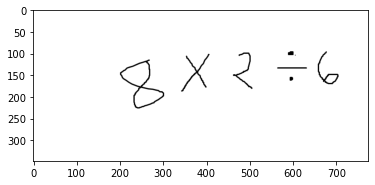

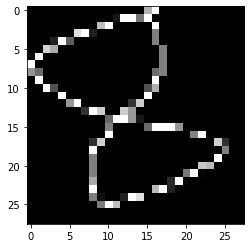

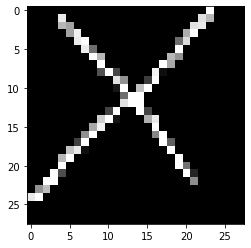

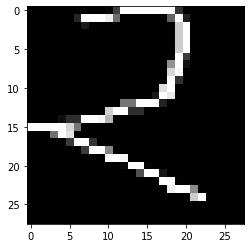

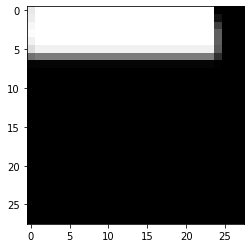

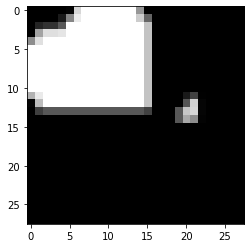

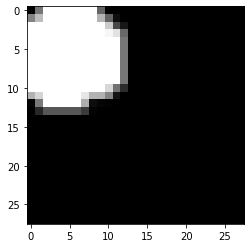

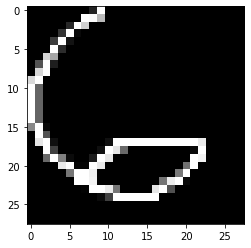

In [143]:
img = cv2.imread('C:\Shubh\Study MAterial\ml\datasets\handwritten equation solver/test4.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,'gray')
plt.show()
if img is not None:
    img=~img
    ret,thresh=cv2.threshold(img,150,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    rects=[]
    
    #Now we store all bounding rectangles in rects array
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)

    #Sometimes, we may get two or more contours for the same digit/symbol. To avoid that, we can check if the
    #bounding rectangle of those two contours overlaps or not. If they overlap, then discard the smaller rectangle.
    
    #bool_rect stores which two rectangles overlaps. It is a n*n array where n is number of rectangles. First subarray stores
    #details about the rectangles on which first one overlaps. So if first subarray is like [0,1,0,0,0] then it shows that 
    #there are 5 rectangles and first rectangle oerlaps with second one.
    
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    
#dump_rect stores the rectangle which we have to remove from our rectangles and then fnal_rect stores the resulting rectangles.
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])

    final_rect=[i for i in rects if i not in dump_rect]

    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        
        im_resize = cv2.resize(im_crop,(28,28))
        plt.imshow(im_resize,'gray')
        plt.show()
        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

In [144]:
train_data = np.array(train_data)
print(train_data.shape)

(7, 28, 28, 1)


In [145]:
pred = model.predict(train_data)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
acc

[8, 12, 2, 13, 13, 13, 6]

In [146]:
s=''
for result in acc:
    if(result==10):
        s=s+'-'
    if(result==11):
        s=s+'+'
    if(result==12):
        s=s+'*'
    if result == 13:
        s=s+'/'
    if(result==0):
        s=s+'0'
    if(result==1):
        s=s+'1'
    if(result==2):
        s=s+'2'
    if(result==3):
        s=s+'3'
    if(result==4):
        s=s+'4'
    if(result==5):
        s=s+'5'
    if(result==6):
        s=s+'6'
    if(result==7):
        s=s+'7'
    if(result==8):
        s=s+'8'
    if(result==9):
        s=s+'9'
    
print(s)

8*2///6


In [142]:
eval(s)

1720

In [97]:
eval('8/4')

2.0